<a href="https://colab.research.google.com/github/JoelHuitron/INTELIGENCIA-ARTIFICIAL/blob/main/AF5_Procesamiento_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1.- Análisis y normalización de datos de sensores en un robot móvil

Actividad #5. Procesamiento de conjuntos de datos en phyton

Joel Alonso Huitron Varela 1967359

María Angélica Ramírez Espericueta 2009245

Nancy pamela plaza muñoz 1898628

Othilia Jimena Flores Duarte 2052999

Cristian Gael Alvarado Ayala 2005742

2.Primeras filas del dataset:
   Tiempo (s)  Distancia (cm)  Velocidad (cm/s)  Temperatura (°C)
0           0       43.708611          9.256646         23.925585
1           1       95.564288         27.095047         23.704682
2           2       75.879455         43.647292         33.593819
3           3       63.879264         36.611244         23.743193
4           4       24.041678         40.328057         24.079246

 3.Dataset después de la limpieza:
     Tiempo (s)  Distancia (cm)  Velocidad (cm/s)  Temperatura (°C)
0             0       43.708611          9.256646         23.925585
1             1       95.564288         27.095047         23.704682
2             2       75.879455         43.647292         33.593819
3             3       63.879264         36.611244         23.743193
4             4       24.041678         40.328057         24.079246
..          ...             ...               ...               ...
995         995       18.242387         32.847758         32.9

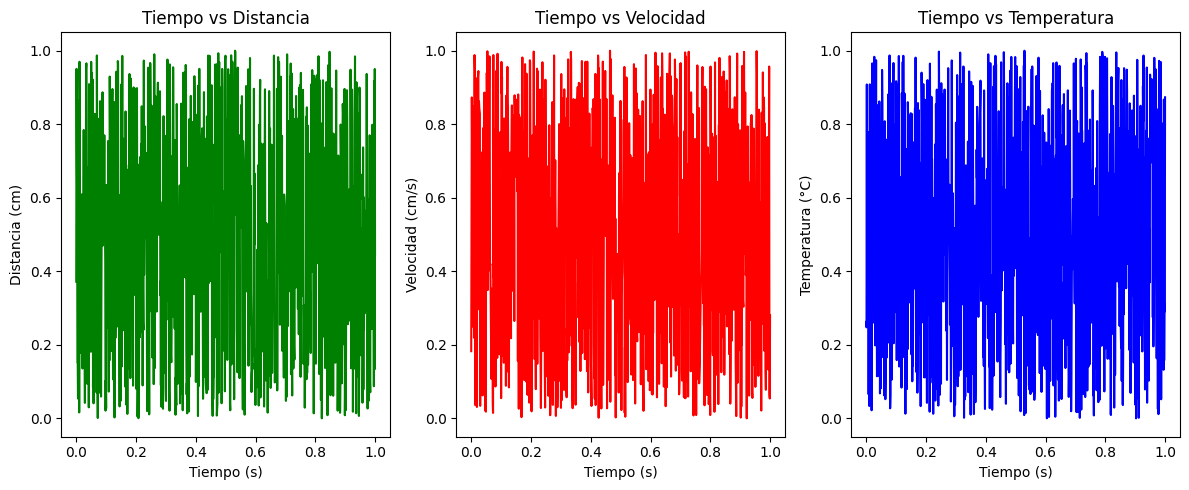

In [9]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#1. se carga el dataset
file_path = "/content/robot_sensors.csv"  # Ruta del archivo en Colab
df = pd.read_csv(file_path)

#2. mostrar las primeras filas del dataset
print("2.Primeras filas del dataset:")
print(df.head())

#3. limpiar los datos
# a) eliminar filas con valores nulos
df_clean = df.dropna().copy()  # Crear copia para evitar el SettingWithCopyWarning

# b) filtrar valores atípicos (por ejemplo: eliminar velocidades negativas)
if 'Velocidad (cm/s)' in df_clean.columns:
    df_clean = df_clean[df_clean['Velocidad (cm/s)'] >= 0].copy()

# se muestra dataset limpio
print("\n 3.Dataset después de la limpieza:")
print(df_clean)

# identificar columnas numéricas y convertirlas a float
numeric_columns = df_clean.select_dtypes(include=['number']).columns
df_clean[numeric_columns] = df_clean[numeric_columns].astype(float)

#4. normalizar datos numéricos con Min-Max Scaling
scaler = MinMaxScaler()
#escala y traduce cada característica individualmente de modo que esté
#dentro del rango dado en el conjunto de entrenamiento, es decir, entre cero y uno.
df_clean.loc[:, numeric_columns] = scaler.fit_transform(df_clean[numeric_columns])

# se muestra dataset limpio y normalizado
print("\n 4.Dataset limpio y normalizado:")
print(df_clean)
print("\n 5.  Gráficas valores vs tiempo usando matplotlib")
#5. se visualiza los datos normalizados: Tiempo (s) vs Distancia (cm), Velocidad (cm/s) y Temperatura (°C)
if 'Tiempo (s)' in df_clean.columns:
    plt.figure(figsize=(12, 5))

    # Tiempo (s) vs Distancia (cm)
    plt.subplot(1, 3, 1)
    plt.plot(df_clean['Tiempo (s)'], df_clean['Distancia (cm)'], color='green')
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Distancia (cm)")
    plt.title("Tiempo vs Distancia")

    # Tiempo (s) vs Velocidad (cm/s)
    plt.subplot(1, 3, 2)
    plt.plot(df_clean['Tiempo (s)'], df_clean['Velocidad (cm/s)'], color='red')
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Velocidad (cm/s)")
    plt.title("Tiempo vs Velocidad")

    # Tiempo (s) vs Temperatura (°C)
    plt.subplot(1, 3, 3)
    plt.plot(df_clean['Tiempo (s)'], df_clean['Temperatura (°C)'], color='blue')
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Temperatura (°C)")
    plt.title("Tiempo vs Temperatura")

    plt.tight_layout()
    plt.show()
else:
    print("No se encontró una columna 'Tiempo (s)' para graficar.")




# Ejercicio 2. Preguntas


---


**1. ¿Cómo afecta la limpieza de datos al análisis del conjunto de datos?**

La limpieza de datos es crucial porque elimina valores nulos que podrían generar errores en los cálculos, reduce el ruido y los valores atípicos, mejorando la precisión del análisis.
Evita sesgos en los modelos de Machine Learning al asegurarse de que los datos sean representativos.
Facilita la visualización al eliminar datos inconsistentes que podrían distorsionar las gráficas.


**2. ¿Por qué es importante la normalización en el aprendizaje automático?**

Porque con la normalización hace que todas las variables tengan la misma escala, evitando que unas dominen a otras.
Mejora la convergencia en algoritmos de optimización, como redes neuronales.
Facilita la interpretación de los datos en gráficos y análisis exploratorios.


**3. ¿Cómo interpretarías los datos visualizados?**

*Tiempo vs distancia:* si hay una caída brusca, puede representar cambio de dirección o tiene un obstáculo.

*Tiempo vs velocidad:* una velocidad constante indica movimiento uniforme, si la velocidad sube y baja, el objeto está acelerando o frenando.

*Tiempo vs temperatura:* si la temperatura aumenta con el tiempo, se está calentando el robot y si hay fluctuaciones podría haber interferencias o cambios ambientales.


**Conclusión**

* La limpieza de datos garantiza resultados más confiables y modelos más precisos.
* La normalización (MinMaxScaler) genera que todas las variables tengan un rango similar, evitando sesgos.
* Los datos ya visualizados ayudan a entender patrones de movimiento y comportamiento del sensor.
